# Predicting Heart Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland database from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease).
There is also a version of it available on [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create Data Dictionary**

* age: Displays the age of the individual.
* sex: Displays the gender of the individual using the following format : 1 = male 0 = female
* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 
    - 0 = typical angina
    - 1 = atypical angina
    - 2 = non — anginal pain
    - 3 = asymptotic
* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.
* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes
* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.
* exang- Exercise induced angina : 1 = yes 0 = no
* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.
* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart
* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

## Note: Code update for next video

Hey, it's Daniel here,

Massive effort on making it to your first milestone project!

Just a quick note on the code in the upcoming video.

As of Scikit-Learn version 1.2+, `plot_roc_curve` is now `RocCurveDisplay`, you can see the documentation for this [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay).

This means if you're running Scikit-Learn version 1.2+, you'll see an error if you try to run `plot_roc_curve`.

**Previous code (before Scikit-Learn version 1.2)**

> \# this will error in Scikit-Learn version 1.2+   
from sklearn.metrics import plot_roc_curve 

**New code (after Scikit-Learn version 1.2)**

> \# Available in Scikit-Learn version 1.2+   
from sklearn.metrics import RocCurveDisplay 

**How to check what Scikit-Learn version you're running**

> import sklearn   
sklearn.__version__ \# will print out the version number

**How to update your Scikit-Learn version**

Running this in your terminal with your Conda environment active will update Scikit-Learn to latest version (the -U stands for update).

`pip install -U scikit-learn`

**More details**

You can see more details about this on the course [GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/issues/45).

Happy machine learning!

## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# plot_roc_curve was replaced by RocCurveDisplay starting with sklearn 1.2+
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts() # 165 examples with subjects having heart disease

1    165
0    138
Name: target, dtype: int64

In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

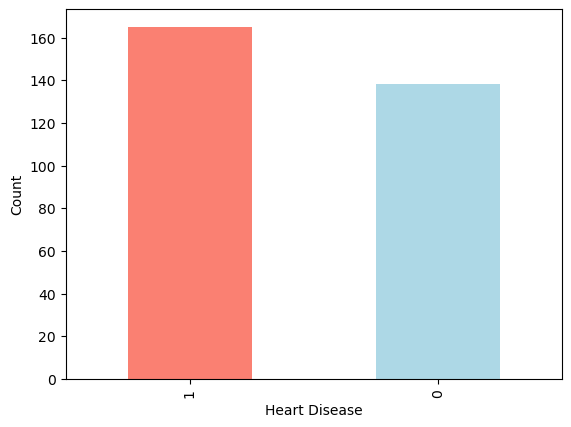

In [6]:
df["target"].value_counts().plot(kind="bar", 
                                 color=["salmon", "lightblue"],
                                 xlabel="Heart Disease",
                                 ylabel="Count",
                                );

In [7]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [9]:
df.sex.value_counts() # alot more male (207) to female (96) in our dataset

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
# 72 out of 96 women in our dataset have heart disease (HD) (roughly 75%)
# 93 out of 207 men in our dataset have HD (roughly 45%)
# based on the sex groups HD % we deduce that 60% of anyone has HD

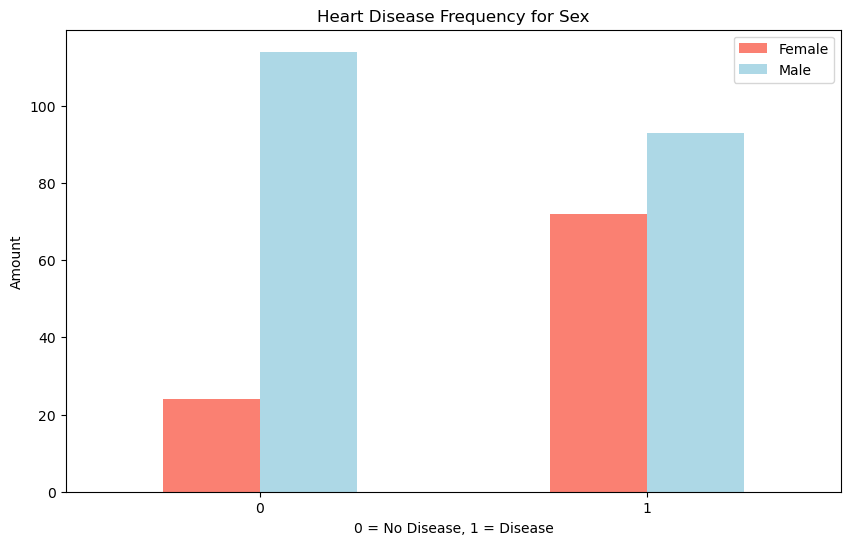

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"],
#                                     xlabel="Heart Disease",
#                                     ylabel="Count",
                                   );
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Talach (Max Heart Rate) for Heart Disease

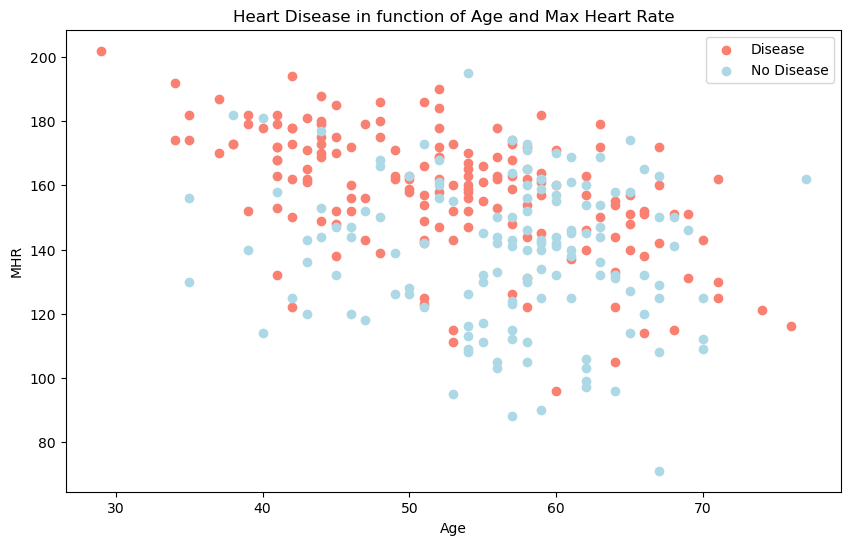

In [13]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon",
           );

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue",
           );

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("MHR")
plt.legend(["Disease", "No Disease"]);

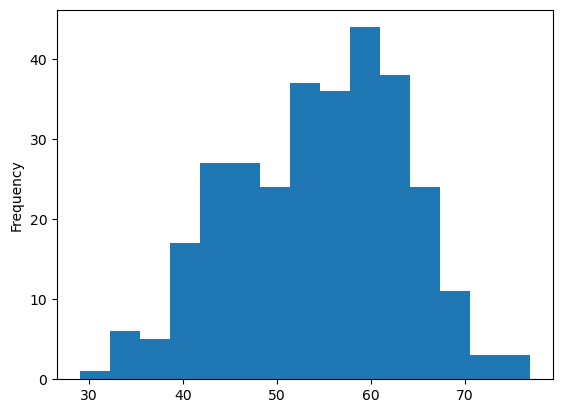

In [14]:
# Check the distribution of the age column with a histogram
df.age.plot.hist(bins=15);

In [15]:
# Our distribution is a normal distribution, but leaned to the right
df.age.mean()

54.366336633663366

### Heart Disease Frequency per Chest Pain (CP) Type

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 
    - 0 = typical angina
    - 1 = atypical angina
    - 2 = non — anginal pain
    - 3 = asymptotic

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


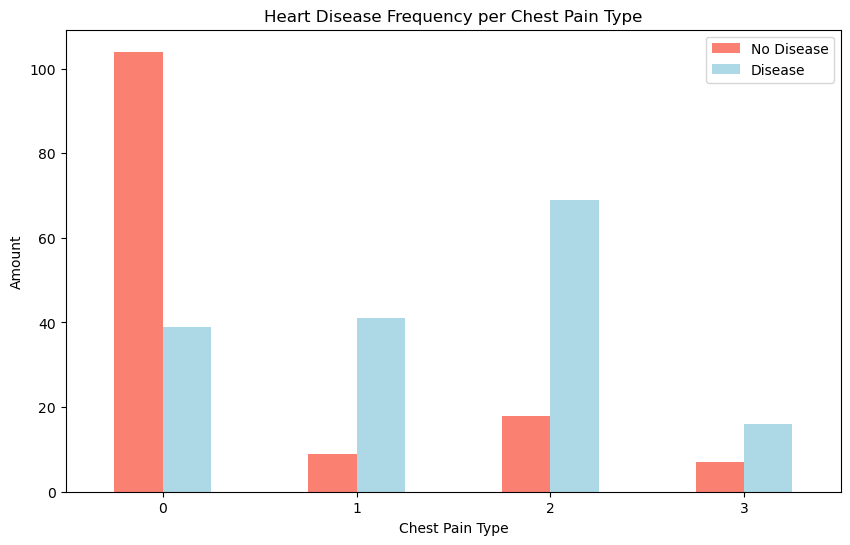

In [17]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]
                                  )

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


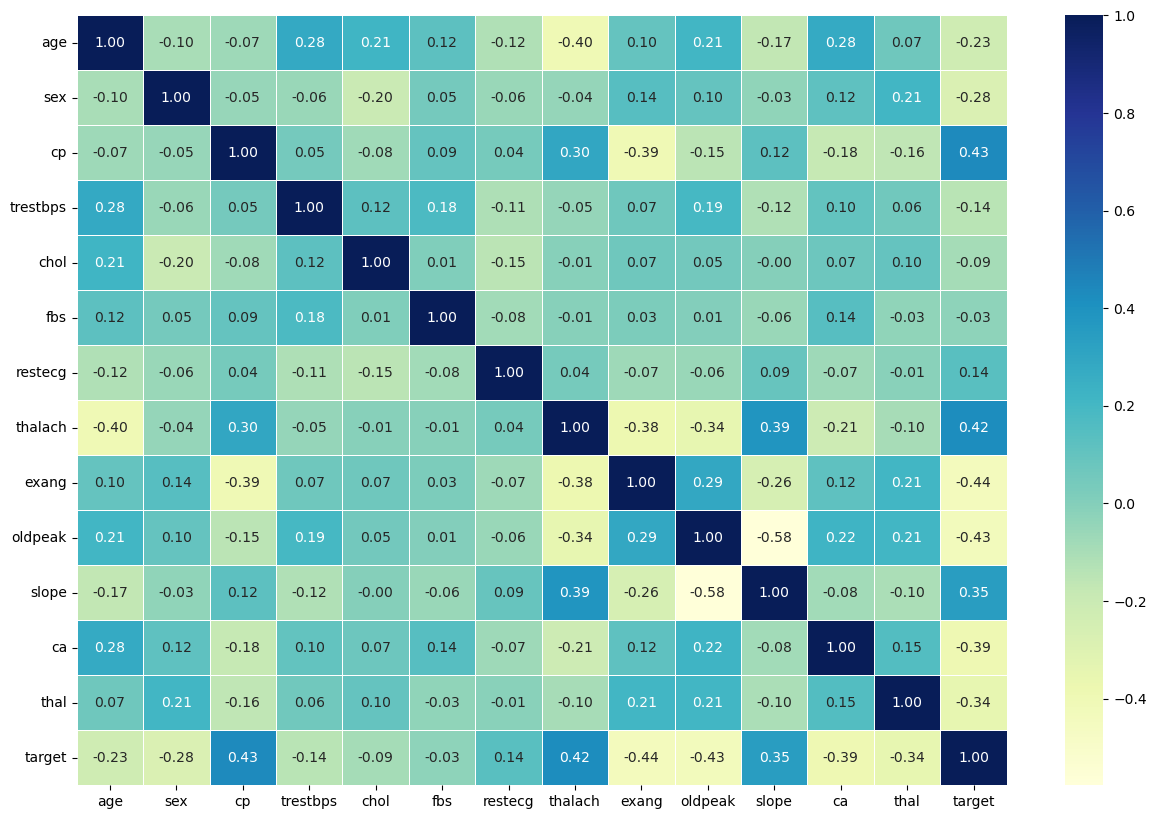

In [20]:
# Let's make our correlation matrix a little prettier using seaborn (sns)
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu",
                );
plt.yticks(rotation=0);
# # Optional code if we get overlaps on the plot
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split data into X and y
X = df.drop("target", axis=1)
# y = df["target"]
# same output as the above line (use if the column name contains no spaces)
y = df.target

In [23]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2
                                                   )

In [24]:
len(X_train), len(y_train)

(242, 242)

Now we've got our data split into traing and test sets, it's time to build a ML model.

We'll train it (find the patterns) on the training set.

And we'll test it on the test set.

We're going to try 3 different ML models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

See [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to understand why we chose these 3 estimators (models). `Logistic Regression` is not on that diagram, but it is a Classification estimator too.

In [25]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [26]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of different sklearn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\rosus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

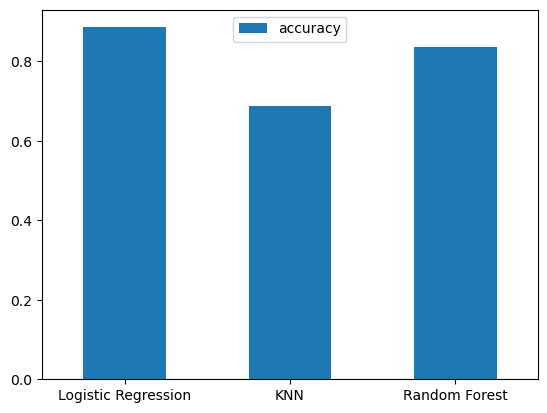

In [28]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(); # T = transposed to chart the accuracy
plt.xticks(rotation=0); # turn the models' labels horizontally
plt.legend(loc="upper center"); # move the accuracy top-center

In [29]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [30]:
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


Now we've got a baseline model and we know a model's first predictions aren't always what we should base our next steps off, what should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance   
... and also on these that are specific to classification:
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1-score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by hand)

In [31]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores[:5]

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967]

In [33]:
test_scores[:5]

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344]

Maximum KNN score on the test data: 75.41%


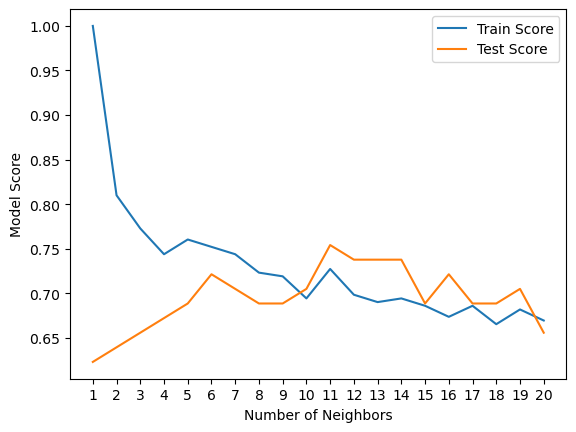

In [34]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

The KNN model (estimator) after hyperparameter tuning, using n_neighbors=11, gets us the maximum score of 75.41%. Still worse than the Logistic Regression and Random Forest Classifier. We'll discard it.

### Hyperparameter Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()  

... using RandomizedSearchCV

In [35]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
}

In [36]:
log_reg_grid["C"]

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [37]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

Why use ranges?
[It is highly recommended to use continuous distributions for continuous parameters.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [38]:
# clf = RandomForestClassifier()
# clf.get_params()

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV. Starting with `LogisticRegression`.

In [39]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, # 20 different combinations (also max value for our C)
                                verbose=True
                               )

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
# Check the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
# Let's evaluate the best params on our test data
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Similar results to our non-tuned LogisticRegression => model is well tuned out of the box.

Now we've tuned LogisticRegression, let's do the same for `RandomForestClassifier`.

In [42]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                          )

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
# Check the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
# Let's evaluate the best params on our test data
rs_rf.score(X_test, y_test)

0.8688524590163934

**RandomizedSearchCV vs. GridSearchCV**  
GridSearchCV searches `exhaustively` for the best hyperparameters.

Steps for hyperparameter tuning:   
1. by hand (e.g., eliminated the KNN model)
2. RandomizedSearchCV (e.g., eliminated the RandomForestClassifier)
3. GridSearchCV (e.g., further tune the LogisticRegression model)

### Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV.

In [45]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"],
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True,
)

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Quick Note: Confusion Matrix Labels
<br/>
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="article-asset--content--1dAQ9 rt-scaffolding"><p>Hey there,</p><p>Just a quick note on the upcoming video(s) using our custom confusion matrix function (<code>plot_conf_mat()</code>).</p><p>The function we create sets the x-axis label to "True label" and the y-axis to "Predicted label".</p><p>However, these should be reversed, so the updated function code should look like:</p><div class="ud-component--base-components--code-block"><div><pre class="prettyprint linenums prettyprinted" role="presentation" style=""><ol class="linenums"><li class="L0"><span class="com"># Import Seaborn</span></li><li class="L1"><span class="kwd">import</span><span class="pln"> seaborn </span><span class="kwd">as</span><span class="pln"> sns</span></li><li class="L2"><span class="pln">sns</span><span class="pun">.</span><span class="kwd">set</span><span class="pun">(</span><span class="pln">font_scale</span><span class="pun">=</span><span class="lit">1.5</span><span class="pun">)</span><span class="pln"> </span><span class="com"># Increase font size</span></li><li class="L3"><span class="pln">&nbsp;</span></li><li class="L4"><span class="kwd">def</span><span class="pln"> plot_conf_mat</span><span class="pun">(</span><span class="pln">y_test</span><span class="pun">,</span><span class="pln"> y_preds</span><span class="pun">):</span></li><li class="L5"><span class="pln">    </span><span class="str">"""</span></li><li class="L6"><span class="str">    Plots a confusion matrix using Seaborn's heatmap().</span></li><li class="L7"><span class="str">    """</span></li><li class="L8"><span class="pln">    fig</span><span class="pun">,</span><span class="pln"> ax </span><span class="pun">=</span><span class="pln"> plt</span><span class="pun">.</span><span class="pln">subplots</span><span class="pun">(</span><span class="pln">figsize</span><span class="pun">=(</span><span class="lit">3</span><span class="pun">,</span><span class="pln"> </span><span class="lit">3</span><span class="pun">))</span></li><li class="L9"><span class="pln">    ax </span><span class="pun">=</span><span class="pln"> sns</span><span class="pun">.</span><span class="pln">heatmap</span><span class="pun">(</span><span class="pln">confusion_matrix</span><span class="pun">(</span><span class="pln">y_test</span><span class="pun">,</span><span class="pln"> y_preds</span><span class="pun">),</span></li><li class="L0"><span class="pln">                     annot</span><span class="pun">=</span><span class="kwd">True</span><span class="pun">,</span><span class="pln"> </span><span class="com"># Annotate the boxes</span></li><li class="L1"><span class="pln">                     cbar</span><span class="pun">=</span><span class="kwd">False</span><span class="pun">)</span></li><li class="L2"><span class="pln">    plt</span><span class="pun">.</span><span class="pln">xlabel</span><span class="pun">(</span><span class="str">"Predicted label"</span><span class="pun">)</span><span class="pln"> </span><span class="com"># predictions go on the x-axis</span></li><li class="L3"><span class="pln">    plt</span><span class="pun">.</span><span class="pln">ylabel</span><span class="pun">(</span><span class="str">"True label"</span><span class="pun">)</span><span class="pln"> </span><span class="com"># true labels go on the y-axis </span></li><li class="L4"><span class="pln">    </span></li><li class="L5"><span class="pln">plot_conf_mat</span><span class="pun">(</span><span class="pln">y_test</span><span class="pun">,</span><span class="pln"> y_preds</span><span class="pun">)</span></li></ol></pre></div></div><p>More succinctly:</p><ul><li><p>X-axis = model predictions</p></li><li><p>y-axis = true labels</p></li></ul><p>Keep this label order in mind going forward when labelling your confusion matrices.</p><p>Daniel</p></div>

### Evaluating our tuned ML `classifier`, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [60]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [62]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

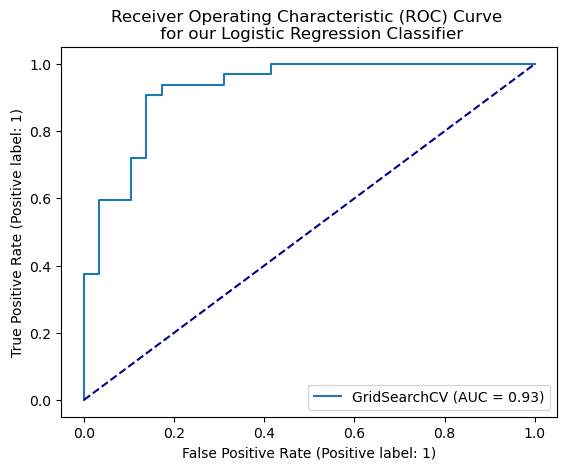

In [75]:
# Plot the ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);
plt.plot([0,1], [0,1], color="darkblue", linestyle="--");
plt.title("Receiver Operating Characteristic (ROC) Curve \n for our Logistic Regression Classifier");

In [76]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


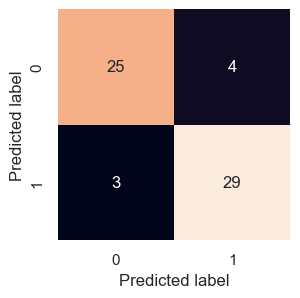

In [83]:
sns.set(font_scale=1)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                    )
    plt.xlabel("Predicted label")
    plt.ylabel("Predicted label")
    
#     bottom, top = ax.get_ylim() # use if confusion matrix has overlaping text
#     ax.set_ylim(bottom + 0.5, top - 0.5) # use if confusion matrix has overlaping text
    
plot_conf_mat(y_test, y_preds)

![](data/confusion_matrix_explained.png)

### Note: Code change in upcoming video
<br/>
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="article-asset--content--1dAQ9 rt-scaffolding"><p>Hey, it's Daniel here,</p><p>Massive effort on making it this far through the first milestone project!</p><p>Just a quick reminder on the code in the upcoming video.</p><p>As of Scikit-Learn version 1.2+, <code>plot_roc_curve</code> is now <code>RocCurveDisplay</code>, you can see the documentation for this here: <a target="_blank" rel="noopener noreferrer" href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay">https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay</a></p><p>This means if you're running Scikit-Learn version 1.2+, you'll see an error if you try to run <code>plot_roc_curve</code>.</p><p><strong>Previous code (before Scikit-Learn version 1.2)</strong></p><div class="ud-component--base-components--code-block"><div><pre class="prettyprint linenums prettyprinted" role="presentation" style=""><ol class="linenums"><li class="L0"><span class="com"># this will error in Scikit-Learn version 1.2+</span></li><li class="L1"><span class="kwd">from</span><span class="pln"> sklearn</span><span class="pun">.</span><span class="pln">metrics </span><span class="kwd">import</span><span class="pln"> plot_roc_curve </span></li></ol></pre></div></div><p><strong>New code (after Scikit-Learn version 1.2)</strong></p><div class="ud-component--base-components--code-block"><div><pre class="prettyprint linenums prettyprinted" role="presentation" style=""><ol class="linenums"><li class="L0"><span class="com"># Available in Scikit-Learn version 1.2+</span></li><li class="L1"><span class="kwd">from</span><span class="pln"> sklearn</span><span class="pun">.</span><span class="pln">metrics </span><span class="kwd">import</span><span class="pln"> </span><span class="typ">RocCurveDisplay</span><span class="pln"> </span></li></ol></pre></div></div><p><strong>How to check what Scikit-Learn version you're running</strong></p><div class="ud-component--base-components--code-block"><div><pre class="prettyprint linenums prettyprinted" role="presentation" style=""><ol class="linenums"><li class="L0"><span class="kwd">import</span><span class="pln"> sklearn</span></li><li class="L1"><span class="pln">sklearn</span><span class="pun">.</span><span class="pln">__version__&nbsp;</span><span class="com">#&nbsp;will print out the version number</span></li></ol></pre></div></div><p><strong>How to update your Scikit-Learn version</strong></p><p>Running this in your terminal with your Conda environment active will update Scikit-Learn to latest version (the <code>-U</code>&nbsp;stands for update).</p><p><code>pip install -U&nbsp;scikit-learn </code> </p><p><strong>More details</strong></p><p>You can see more details about this on the course GitHub: <a target="_blank" rel="noopener noreferrer" href="https://github.com/mrdbourke/zero-to-mastery-ml/issues/45">https://github.com/mrdbourke/zero-to-mastery-ml/issues/45</a></p><p>Happy machine learning!</p></div>

In [85]:
# !pip install -U scikit-learn

Now we've got a ROC curve, an AUC metri and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



* a model which predicts no false positives has a precision of 1.0
* a model which predicts no false negatives has a recall of 1.0

### Calculate Evaluation Metrics Using Cross-Validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [90]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [91]:
# Create a new classifier with the best parameters that we found
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [98]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [99]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [101]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [102]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [103]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

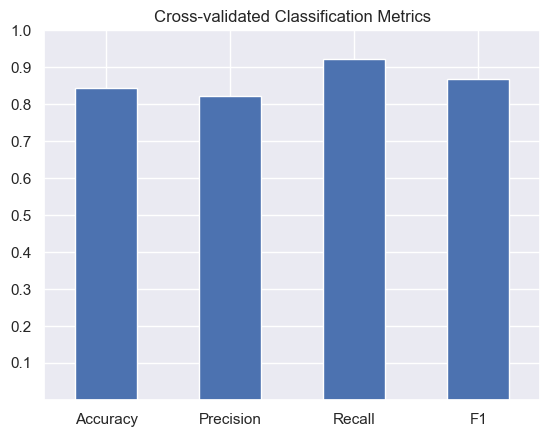

In [121]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                     legend=False);
plt.xticks(rotation=0);
plt.yticks(np.arange(0.1, 1.1, 0.1));

### Feature Importance

Feature importance is another way of asking "which feature(s) contributed most to the outcome of the model and how did it/they contribute?".

Finding feature importance is different for each ML model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our Logistic Regression model.

In [123]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
# Fit an instance of Logistic Regression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train);

In [128]:
# Check coef_
# How each independent variable (parameter) contributes to our label (target)
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [129]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

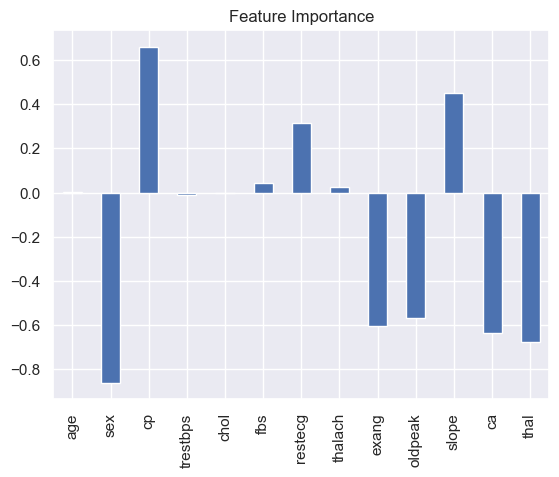

In [133]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                      legend=False);

This feature importance chart `clf.coef_` kind of reminds us of the correlation matrix `df.corr()` we created in the beginning of this project. We're now doing model driven exploratory DA, ML based.

In [145]:
pd.crosstab(df["sex"], df["target"]) # negative coefficient

target,0,1
sex,,
0,24,72
1,114,93


In [146]:
pd.crosstab(df["slope"], df["target"]) # strong positive coefficient

target,0,1
slope,,
0,12,9
1,91,49
2,35,107



slope- Slope of the peak exercise ST segment: 
+ 0 = upsloping: better heart rate with excercise (uncommon)
+ 1 = flat: minimal change (typical healthy heart)
+ 2 = downsloping: signs of unhealthy heart

## 6. Experimentation

If you haven't hit your evaluation metric yet, ask yourself:

* Could you collect more data?
* Could you try a better model? (e.g., CatBoost or XGBoost)
* Could you improve the current models?
* If your model is good enough (you have hit your evaluation metrics) how would you export it and share it with others?